### Data Preprocessing dengan Scikit-Learn 

In [3]:
# import library yang digunkanan
import numpy as np
from sklearn import preprocessing

#### Sample Data

In [6]:
sample_data = np.array([[2.1, -1.9, 5.5],
                       [-1.5, 2.4, 3.5],
                       [0.5, -7.9, 5.6],
                       [5.9, 2.3, -5.8]])
sample_data
# Sample data yang dibuat merupakan data futures yang terdiri
# atas 4 baris dan 3 kolom (3 variabel futures)

array([[ 2.1, -1.9,  5.5],
       [-1.5,  2.4,  3.5],
       [ 0.5, -7.9,  5.6],
       [ 5.9,  2.3, -5.8]])

In [8]:
# Menampilkan ukuran(dimensi) sample_data
sample_data.shape
# baris 4, kolom (futures) sebanyak 3

(4, 3)

### Teknik Data Preprocessing dengan Scikit-Learn 
#### 1. Binarisation
#### 2. Scaling
#### 3. L1 Normalisation: Least Absolute Deviations
#### 4. L2 Normalisation: Least Squares

#### 1. Binarisation
Teknik ini untuk menghasilkan suatu data yang terdiri dari dua nilai numerik saja, yaitu 0 dan 1.

In [12]:
preprocessor = preprocessing.Binarizer(threshold = 0.5)
# Membuat objek binarizer menggunakan modul preprocessing dari library sklearn.
# Parameter threshold = 0.5 menentukan batas ambang binarisasi.
# Jika nilai elemen lebih besar dari 0.5, elemen tersebut akan diubah menjadi 1. Sebaliknya akan diubah menjadi 0.

binarized_data = preprocessor.transform(sample_data)
# Metode transform() digunakan untuk menerapkan proses binarisasi pada data sample_data menggunakan aturan threshold yang telah ditentukan.
# Jika elemen > 0.5 → diubah menjadi 1.
# Jika elemen ≤ 0.5 → diubah menjadi 0.

binarized_data
# Data hasil transformasi akan disimpan dalam variabel binarized_data yang berisi NumPy array.
# Setiap nilai dalam sample_data telah diubah sesuai aturan binarisasi.

array([[1., 0., 1.],
       [0., 1., 1.],
       [0., 0., 1.],
       [1., 1., 0.]])

#### 2. Scaling
Berguna untuk menghasilkan suatu data numerik yang berada dalam rentang skala data tertentu.

In [27]:
preprocessor1 = preprocessing.MinMaxScaler(feature_range = (0,1))
# Membuat objek MinMaxScaler dari modul preprocessing dalam library sklearn.
# Parameter feature_range=(0,1) menentukan rentang nilai minimum dan maksimum untuk hasil scaling.
# Dalam hal ini, nilai data akan dinormalisasi sehingga berada dalam rentang [0, 1].
# MinMaxScaler menghitung nilai minimum dan maksimum setiap fitur (kolom) dari data input, kemudian mengaplikasikan rumus:
# x' = (x-min)/(max-min)
# di mana min dan max adalah nilai minimum dan maksimum di setiap kolom.

preprocessor1.fit(sample_data)
# Memahami (fit) data sample_data untuk menghitung nilai minimum (min) dan maksimum (max) di setiap kolom.
# Proses ini tidak mengubah data; hanya menghitung parameter yang diperlukan untuk transformasi.
# kolom 1 : min = -1.5 dan max = 5.9
# kolom 2 : min = -7.9 dan max = 2.4
# kolom 3 : min = -5.8 dan max = 5.6

scaled_data = prepocessor1.transform(sample_data)
# Transformasi data menggunakan parameter yang dihitung selama proses fit().
# Data pada setiap kolom dinormalisasi ke rentang [0, 1] menggunakan rumus:
# x' = (x-min)/(max-min)
# Proses ini dilakukan secara elemen per elemen untuk setiap kolom di sample_data.

scaled_data
# scaled_data menyimpan hasil dari transformasi, yaitu versi ter-skala dari sample_data di mana semua elemen berada dalam rentang [0, 1].

array([[0.48648649, 0.58252427, 0.99122807],
       [0.        , 1.        , 0.81578947],
       [0.27027027, 0.        , 1.        ],
       [1.        , 0.99029126, 0.        ]])

In [28]:
# Cara di atas mungkin agk rumit
# berikut cara simple nya
scaled_data1 = preprocessor1.fit_transform(sample_data)
scaled_data1

array([[0.48648649, 0.58252427, 0.99122807],
       [0.        , 1.        , 0.81578947],
       [0.27027027, 0.        , 1.        ],
       [1.        , 0.99029126, 0.        ]])

#### 3. L1 Normalisation: Least Absolute Deviations
Tujuannya untuk melakukan normalisasi terhadap data numerik yang kita miliki.
Rumus untuk L1 Normalisation: Least Absolute Deviations ditulis sebagi berikut:
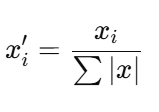

di mana ∑∣x∣ adalah jumlah nilai absolut dari semua elemen dalam baris tersebut.

In [32]:
l1_normalised_data = preprocessing.normalize(sample_data, norm = "l1")
# Fungsi preprocessing.normalize() dari library sklearn digunakan untuk melakukan normalisasi data.
# Parameter norm="l1" menentukan bahwa normalisasi dilakukan berdasarkan norma L1 (Manhattan norm).
# Pada norma L1, setiap baris dalam data dinormalisasi sehingga jumlah nilai absolut dari elemen-elemen dalam baris tersebut sama dengan 1.
# Rumus normalisasi L1 untuk elemen 𝑥𝑖 dalam baris 𝑥:
# 𝑥'𝑖 = 𝑥𝑖/∑∣x∣ 
# di mana ∑∣x∣ adalah jumlah nilai absolut dari semua elemen dalam baris tersebut.
# Proses ini diterapkan pada setiap baris secara independen.

l1_normalised_data
# Menyimpan hasil dari data yang telah dinormalisasi menggunakan norma L1.

array([[ 0.22105263, -0.2       ,  0.57894737],
       [-0.2027027 ,  0.32432432,  0.47297297],
       [ 0.03571429, -0.56428571,  0.4       ],
       [ 0.42142857,  0.16428571, -0.41428571]])

#### 4. L2 Normalisation: Least Squares
Untuk L2 Normalisation: Least Squares gunakan rumus berikut:
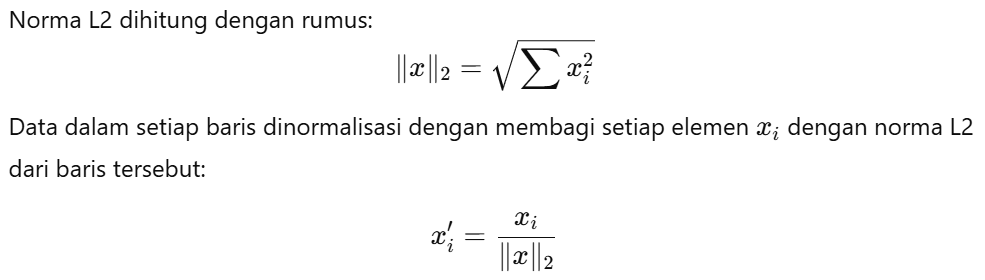

In [33]:
l2_normalised_data = preprocessing.normalize(sample_data, norm = "l2")
# preprocessing.normalize():
# Fungsi dari library sklearn ini digunakan untuk menormalisasi data.
# Parameter norm="l2" menentukan bahwa normalisasi dilakukan berdasarkan norma L2 (Euclidean norm).
# Pada norma L2, setiap baris dinormalisasi sehingga panjang vektor (magnitudo) dari baris tersebut sama dengan 1.
# Norma L2 dihitung dengan rumus ∥𝑥∥2 pada definisi di atas.
# Data dalam setiap baris dinormalisasi dengan membagi setiap elemen 𝑥𝑖 dengan norma L2 dari baris tersebut, yaitu 𝑥'𝑖.

l2_normalised_data
# Variabel ini menyimpan hasil transformasi, yaitu data yang sudah dinormalisasi menggunakan norma L2.
# Setiap baris dalam hasil normalisasi akan memiliki panjang vektor ∥𝑥∥2 = 1

array([[ 0.33946114, -0.30713151,  0.88906489],
       [-0.33325106,  0.53320169,  0.7775858 ],
       [ 0.05156558, -0.81473612,  0.57753446],
       [ 0.68706914,  0.26784051, -0.6754239 ]])